In [13]:
from helpers import *
from tqdm import notebook
from joblib import Parallel, delayed
import scipy.stats as st
import pandas as pd
import seaborn as sns
from itertools import zip_longest
import csv

In [14]:
df = pd.read_csv("data/a280.tsp.txt", skiprows=6, names=["id", "x", "y"], 
                 header=None, delimiter = r"[ ]{1,}", index_col=0, engine='python').drop("EOF")

In [30]:
# globals
START_TEMP = 30
ALPHA = 0.3
STOP_TEMP = 0.1
MARKOV_LENGTH = 50
STRAT = "2opt"
DATA_POINTS = 320

In [54]:
# elementary edit experiment
def experiment1(strat, alt_strat=False, second_strat=-1):
    sim = AnnealTVS(df, K=START_TEMP, stopK=STOP_TEMP, alpha = ALPHA, markov_length = MARKOV_LENGTH, elementary=strat, alternate=alt_strat, secondary=second_strat)
    ans = sim.run_sim()
    return ans    

In [46]:
%%time
# try 2opt
strat="2opt"
results_2opt= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="insert"
results_insert= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="swap"
results_swap= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
                                      for i in range(DATA_POINTS))
strat="insert"
second_strat="2opt"
results_ins2opt= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat, alt_strat = True, second_strat = second_strat)
                                      for i in range(DATA_POINTS))


CPU times: user 66 ms, sys: 12.3 ms, total: 78.3 ms
Wall time: 3min 15s


In [47]:
res_2opt = []
for result in results_2opt:
    res_2opt.append(result[0])

res_insert = []
for result in results_insert:
    res_insert.append(result[0])

res_swap = []
for result in results_swap:
    res_swap.append(result[0])

res_ins2opt = []
for result in results_ins2opt:
    res_ins2opt.append(result[0])

with open('./outputdata/stratcomp_v2.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for x, y, z, a in zip_longest(res_2opt, res_insert, res_swap, res_ins2opt):
        w.writerow([x, y, z, a])

In [38]:
# %%time
# # try 2opt
# strat="2opt"
# results_2opt= Parallel(n_jobs=8)(delayed(experiment1)(strat = strat)
#                                       for i in range(160))

# res_2opt = []
# for result in results_2opt:
#     res_2opt.append(result[0])

CPU times: user 521 ms, sys: 129 ms, total: 650 ms
Wall time: 14min 21s


160


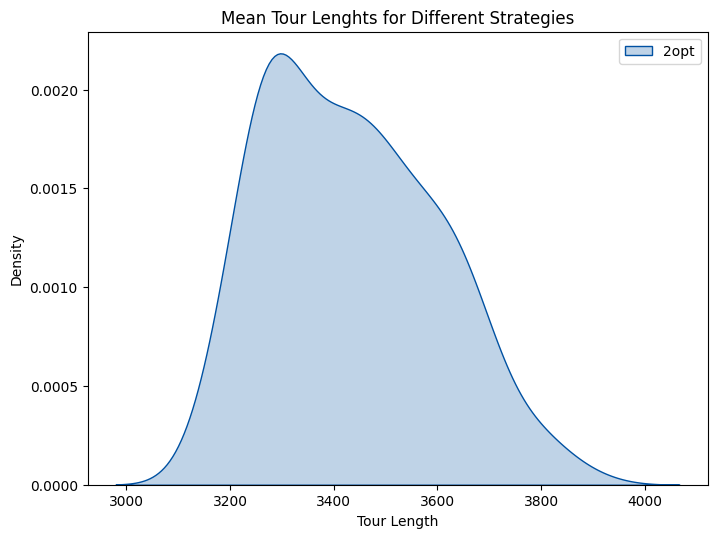

In [42]:
# # RUN ONLY FOR 2OPT TO CHECK HOW DISTRIBUTION LOOKS LIKE AT 100 RUNS
# # 160 runs not enough.
# res_2opt = []
# for result in results_2opt:
#     res_2opt.append(result[0])
# print(len(res_2opt))

# fig = plt.figure(figsize=(8, 6), dpi=100)
# ax = fig.add_subplot(111, axisbelow=True)
# ax = sns.kdeplot(res_2opt, shade=True, color="#0051a2", label='2opt')
# plt.xlabel('Tour Length')
# plt.title('Mean Tour Lenghts for Different Strategies')
# plt.legend()
# plt.show()

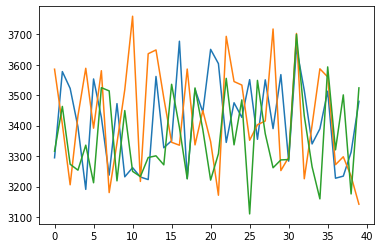

In [35]:
# plt.plot(results_2opt)
# plt.plot(results_insert)
# plt.plot(results_swap)

In [106]:
# r_2opt, r_insert, r_swap = np.loadtxt("./outputdata/stratcomp.csv", delimiter=",", unpack=True)
r_2opt, r_insert, r_swap, r_ins2opt = np.loadtxt("./outputdata/stratcomp_v2.csv", delimiter=",", unpack=True)
all_strat_results = [r_2opt, r_insert, r_swap, r_ins2opt]
all_strat_names = ['2opt', 'insert', 'swap', 'insert-2opt']

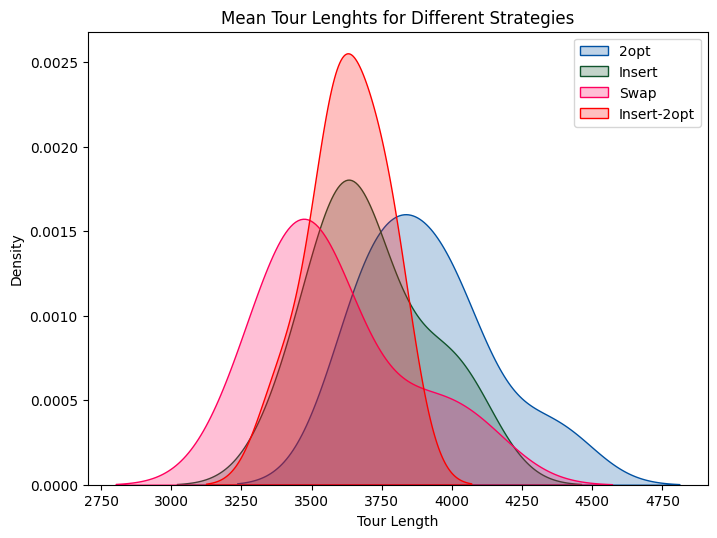

In [103]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax = sns.kdeplot(r_2opt, shade=True, color="#0051a2", label='2opt')
ax = sns.kdeplot(r_insert, shade=True, color="#10542c", label='Insert')
ax = sns.kdeplot(r_swap, shade=True, color="#ff005e", label='Swap')
ax = sns.kdeplot(r_ins2opt, shade=True, color="red", label='Insert-2opt')
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Strategies')
plt.legend()
plt.show()
fig.savefig("./figures/strats_distr.png")

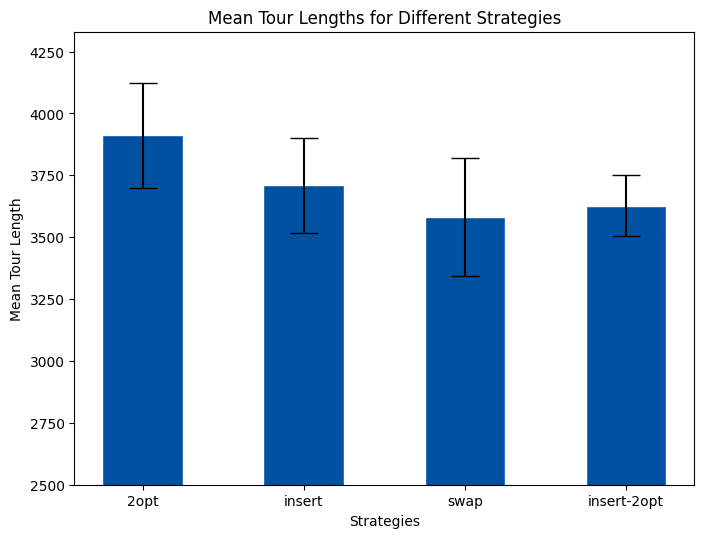

In [108]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_strat_results[i]) for i in range(len(all_strat_results))]
err = [np.std(all_strat_results[i]) for i in range(len(all_strat_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_strat_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Strategies')
plt.title('Mean Tour Lengths for Different Strategies')
plt.xticks([r for r in range(len(all_strat_results))], all_strat_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/strats_barplot.png")

In [61]:
# globals
START_TEMP = 3
ALPHA = 0.99
STOP_TEMP = 0.0001
MARKOV_LENGTH = 200
STRAT = "insert"
SECOND_STRAT = "2opt"
DATA_POINTS = 160

# starting temp experiment
def experiment2(temp):
    sim = AnnealTVS(df, K=temp, stopK=STOP_TEMP, alpha = ALPHA, markov_length = MARKOV_LENGTH, elementary=STRAT, alternate=True, secondary=SECOND_STRAT)
    ans = sim.run_sim()
    return ans   
    

In [62]:
%%time
# try some temperatures
temp = 5
results_5= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 10
results_10= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 20
results_20= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 30
results_30= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 40
results_40= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 50
results_50= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))
temp = 100
results_100= Parallel(n_jobs=8)(delayed(experiment2)(temp=temp)
                                      for i in range(DATA_POINTS))



CPU times: user 94.8 ms, sys: 83 ms, total: 178 ms
Wall time: 23min 6s


In [63]:
res_t5 = []
for result in results_5:
    res_t5.append(result[0])

res_t10 = []
for result in results_10:
    res_t10.append(result[0])

res_t20 = []
for result in results_20:
    res_t20.append(result[0])

res_t30 = []
for result in results_30:
    res_t30.append(result[0])

res_t40 = []
for result in results_40:
    res_t40.append(result[0])

res_t50 = []
for result in results_50:
    res_t50.append(result[0])

res_t100 = []
for result in results_100:
    res_t100.append(result[0])

with open('./outputdata/tempcomp.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a, b, c, d, e, f, g in zip_longest(res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100):
        w.writerow([a, b, c, d, e, f, g])

In [109]:
# Analyze results of different temperatures
res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100 = np.loadtxt("./outputdata/tempcomp.csv", delimiter=",", unpack=True)
all_temp_results = [res_t5, res_t10, res_t20, res_t30, res_t40, res_t50, res_t100]
all_temp_names = [5, 10, 20, 30, 40, 50, 100]

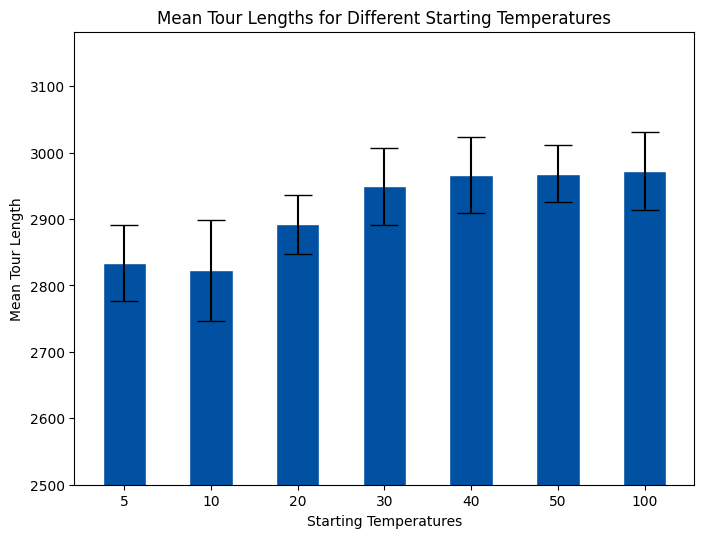

In [110]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_temp_results[i]) for i in range(len(all_temp_results))]
err = [np.std(all_temp_results[i]) for i in range(len(all_temp_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_temp_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Starting Temperatures')
plt.title('Mean Tour Lengths for Different Starting Temperatures')
plt.xticks([r for r in range(len(all_temp_results))], all_temp_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/temp_barplot.png")

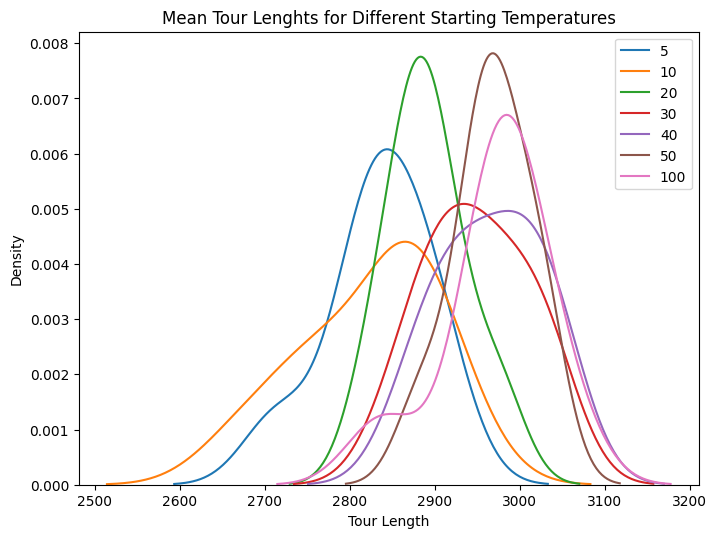

In [111]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
for i in range(len(all_temp_results)):
    ax = sns.kdeplot(all_temp_results[i], shade=False, label=all_temp_names[i])
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Starting Temperatures')
plt.legend()
plt.show()
fig.savefig("./figures/temp_distr.png")

In [91]:
# mins = [np.min(all_temp_results[i]) for i in range(len(all_temp_results))]
# print(mins)

[2714.5825361307016, 2676.2408050748877, 2822.6998924463373, 2856.7150199164316, 2872.8891598742475, 2885.5744821243775, 2838.8405434439096]


In [75]:
# globals
START_TEMP = 3
ALPHA = 0.99
STOP_TEMP = 0.0001
MARKOV_LENGTH = 200
STRAT = "insert"
SECOND_STRAT = "2opt"
DATA_POINTS = 160

# Markov Chain length
def experiment3(length):
    sim = AnnealTVS(df, K=START_TEMP, stopK=STOP_TEMP, alpha = ALPHA, markov_length = length, elementary=STRAT, alternate=True, secondary=SECOND_STRAT)
    ans = sim.run_sim()
    return ans   
    

In [76]:
%%time
# try some lengths
length = 50
results_50= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 100
results_100= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 200
results_200= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 300
results_300= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))
length = 400
results_400= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))              
length = 500
results_500= Parallel(n_jobs=8)(delayed(experiment3)(length=length)
                                      for i in range(DATA_POINTS))

In [77]:
res_len50 = []
for result in results_50:
    res_len50.append(result[0])

res_len100 = []
for result in results_100:
    res_len100.append(result[0])

res_len200 = []
for result in results_200:
    res_len200.append(result[0])

res_len300 = []
for result in results_300:
    res_len300.append(result[0])

res_len400 = []
for result in results_400:
    res_len400.append(result[0])

res_len500 = []
for result in results_500:
    res_len500.append(result[0])

with open('./outputdata/markovlencomp.csv', 'w', newline='') as myfile:
    w = csv.writer(myfile)
    # w.writerow(['2opt','insert','swap'])
    for a, b, c, d, e, f in zip_longest(res_len50, res_len100, res_len200, res_len300, res_len400, res_len500):
        w.writerow([a, b, c, d, e, f])

In [81]:
res_len50, res_len100, res_len200, res_len300, res_len400, res_len500 = np.loadtxt("./outputdata/markovlencomp.csv", delimiter=",", unpack=True)
all_len_results = [res_len50, res_len100, res_len200, res_len300, res_len400, res_len500]
all_len_names = [50, 100, 200, 300, 400, 500]

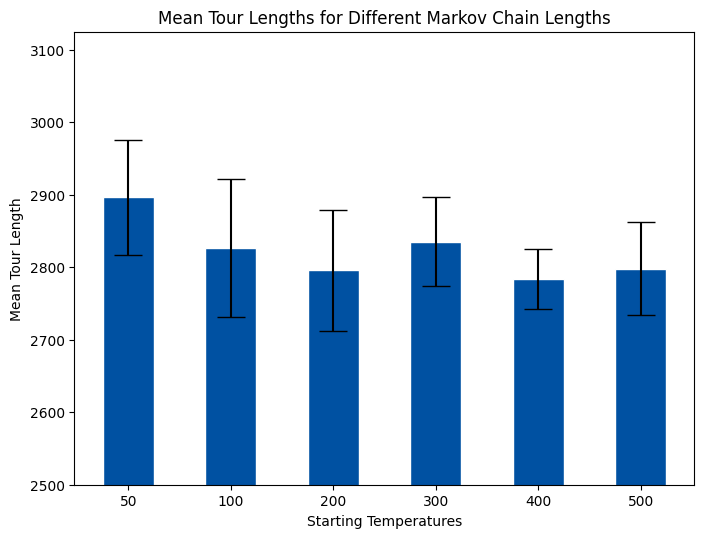

In [98]:
# set width of bars
barWidth = 0.5
bar = [np.mean(all_len_results[i]) for i in range(len(all_len_results))]
err = [np.std(all_len_results[i]) for i in range(len(all_len_results))]


# Set position of bar on X axis
r1 = np.arange(len(all_len_results))

 
# Make the plot
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(r1, bar, yerr = err, color="#0051a2", width=barWidth, edgecolor='white', capsize=10)

# Add xticks on the middle of the group bars
plt.ylabel('Mean Tour Length')
plt.xlabel('Starting Temperatures')
plt.title('Mean Tour Lengths for Different Markov Chain Lengths')
plt.xticks([r for r in range(len(all_len_results))], all_len_names)
plt.ylim(2500,)

 
# Create legend & Show graphic
plt.show()
fig.savefig("./figures/len_barplot.png")

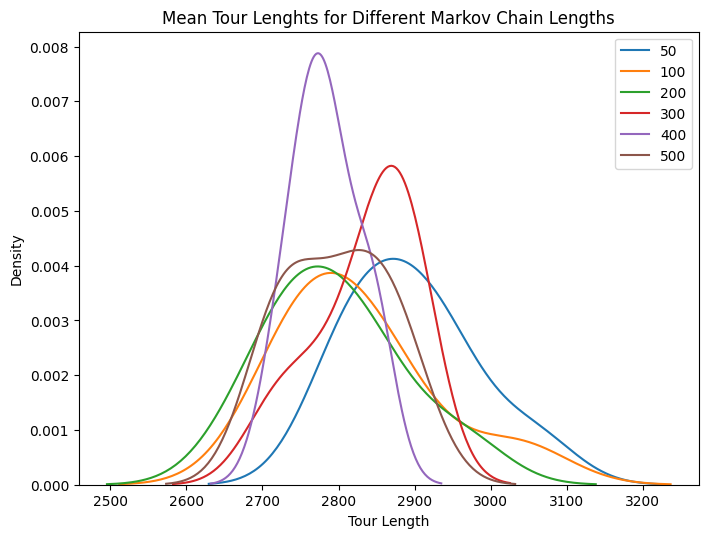

In [99]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111, axisbelow=True)
for i in range(len(all_len_results)):
    ax = sns.kdeplot(all_len_results[i], shade=False, label=all_len_names[i])
plt.xlabel('Tour Length')
plt.title('Mean Tour Lenghts for Different Markov Chain Lengths')
plt.legend()
plt.show()
fig.savefig("./figures/len_distr.png")